In [1]:
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

%config InlineBackend.figure_formats = ['svg']
plt.rcParams['axes.linewidth'] = 1.0

# Fault-tolerant gates for parity-protected qubits

In [2]:
def hamiltonian(Ec, Ej, N, ng):
    '''
        Hamiltonian for the cos2phi qubit
    '''
    m = np.diag(4 * Ec * (np.arange(-N, N + 1) - ng) ** 2) + 0.5 * Ej * (
        np.diag(np.ones(2 * N - 1), 2) + np.diag(np.ones(2 * N - 1), -2)
    )
    return qt.Qobj(m)

In [55]:
N0 = 20
H_2p = hamiltonian(Ec=0.04, Ej=2, N=N0, ng=0)

eig_val, eig_state = H_2p.eigenstates()

In [56]:
H_2p

Quantum object: dims=[[41], [41]], shape=(41, 41), type='oper', dtype=Dense, isherm=True
Qobj data =
[[64.    0.    1.   ...  0.    0.    0.  ]
 [ 0.   57.76  0.   ...  0.    0.    0.  ]
 [ 1.    0.   51.84 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... 51.84  0.    1.  ]
 [ 0.    0.    0.   ...  0.   57.76  0.  ]
 [ 0.    0.    0.   ...  1.    0.   64.  ]]

In [57]:
g = eig_state[0]

g

Quantum object: dims=[[41], [1]], shape=(41, 1), type='ket', dtype=Dense
Qobj data =
[[ 8.00437228e-13]
 [-7.34869585e-17]
 [-5.22227081e-11]
 [ 1.38665514e-17]
 [ 2.77132335e-09]
 [-1.49470779e-16]
 [-1.16905182e-07]
 [ 9.64257909e-18]
 [ 3.80865649e-06]
 [-3.29502309e-17]
 [-9.23676630e-05]
 [ 9.63559399e-17]
 [ 1.58886180e-03]
 [-3.73295187e-17]
 [-1.81520997e-02]
 [ 1.49245678e-16]
 [ 1.25525348e-01]
 [-7.25201918e-16]
 [-4.59186613e-01]
 [ 1.79727282e-15]
 [ 7.38997983e-01]
 [-1.79587878e-15]
 [-4.59186613e-01]
 [ 7.21855998e-16]
 [ 1.25525348e-01]
 [-1.40664262e-16]
 [-1.81520997e-02]
 [ 1.56084181e-17]
 [ 1.58886180e-03]
 [-1.10274836e-18]
 [-9.23676630e-05]
 [ 5.36164876e-20]
 [ 3.80865649e-06]
 [-1.89753505e-21]
 [-1.16905182e-07]
 [ 5.09793238e-23]
 [ 2.77132335e-09]
 [-1.07402269e-24]
 [-5.22227081e-11]
 [ 1.82029309e-26]
 [ 8.00437228e-13]]

In [58]:
e = eig_state[1]

e

Quantum object: dims=[[41], [1]], shape=(41, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.00000000e+00]
 [-6.63628554e-12]
 [ 0.00000000e+00]
 [ 3.91554557e-10]
 [-4.68520269e-26]
 [-1.85851822e-08]
 [ 2.01625274e-24]
 [ 6.91758972e-07]
 [-1.04749064e-20]
 [-1.95457856e-05]
 [ 2.54027166e-19]
 [ 4.01991747e-04]
 [-4.36949809e-18]
 [-5.68956631e-03]
 [ 4.99166045e-17]
 [ 5.12710076e-02]
 [-3.45146741e-16]
 [-2.63076283e-01]
 [ 1.26235353e-15]
 [ 6.54316147e-01]
 [-2.03068358e-15]
 [-6.54316147e-01]
 [ 1.25981582e-15]
 [ 2.63076283e-01]
 [-3.41705373e-16]
 [-5.12710076e-02]
 [ 4.12403401e-17]
 [ 5.68956631e-03]
 [-1.62390443e-17]
 [-4.01991747e-04]
 [ 2.13954424e-17]
 [ 1.95457856e-05]
 [-1.66255627e-17]
 [-6.91758972e-07]
 [-1.27122705e-17]
 [ 1.85851822e-08]
 [ 3.84472358e-17]
 [-3.91554565e-10]
 [-2.53567783e-17]
 [ 6.63628518e-12]
 [ 3.29868511e-17]]

In [59]:
p = (g+e).unit()
m = (g-e).unit()

In [60]:
def plot_wavefunction_3d(psi_qobj_list, num_states, idx, savefig=False, N0=20):
    """
    Plot the real and imaginary parts of a QuTiP ket vs the charge basis index N,
    with axes arranged as follows:
      - X-axis: N (charge basis label)
      - Y-axis: Im[ψ]
      - Z-axis: Re[ψ]

    Parameters
    ----------
    psi_qobj : qutip.Qobj
        A ket with shape (2*N0+1, 1), dims=[[2*N0+1],[1]].
    N0 : int
        Maximum Cooper-pair number; the basis runs from -N0 to +N0.
    """
    expected_shape = (2*N0+1, 1)
    psi_qobj_sample = psi_qobj_list[0]
    assert psi_qobj_sample.type == 'ket' and psi_qobj_sample.shape == expected_shape, \
        f"Expected ket of shape {expected_shape}, got {psi_qobj_sample.shape}"
    
    real_vals_list = []
    imag_vals_list = []
    for i in range(num_states):
        psi_vec = psi_qobj_list[i].full().flatten()
        real_vals_list.append(np.real(psi_vec))
        imag_vals_list.append(np.imag(psi_vec))

    N = np.arange(-N0, N0+1)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(num_states):
        ax.plot(N, imag_vals_list[i], real_vals_list[i])
    ax.set_zlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('Charge eigenstate N')
    ax.set_ylabel(r'Im[$\psi$]')
    ax.set_zlabel(r'Re[$\psi$]')
    plt.tight_layout()
    if savefig == True:
        plt.savefig(f'./images/pres/{idx}.png')
        plt.close()
    else:
        plt.show()

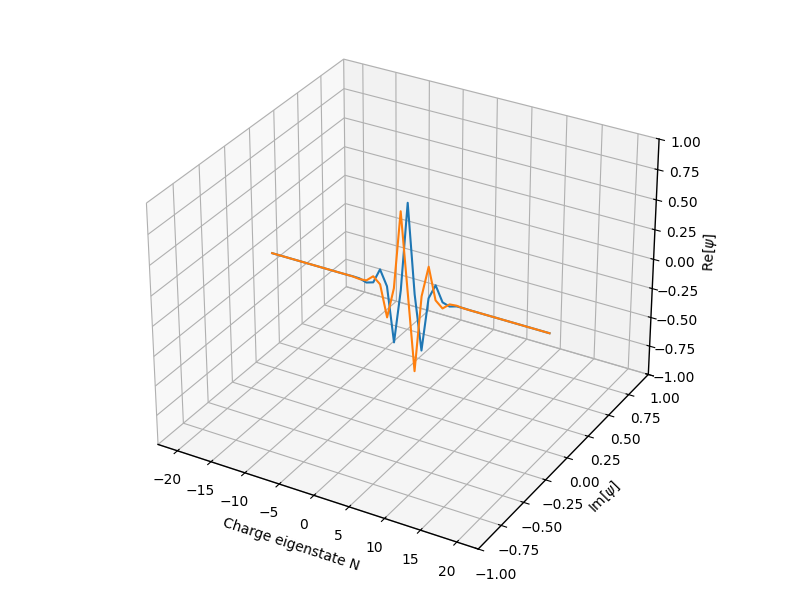

In [61]:
plot_wavefunction_3d([g, e], num_states=2, idx=0, savefig=False, N0=N0)

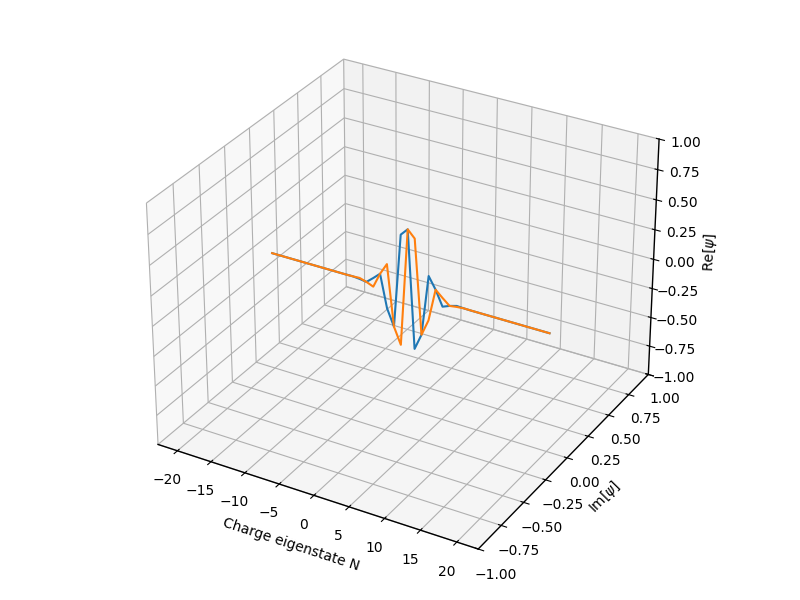

In [62]:
plot_wavefunction_3d([p, m], num_states=2, idx=0, savefig=False, N0=N0)

In [246]:
Ec = 0.04
ng = 0

H_2p_mod = H_2p + qt.Qobj(np.diag(4 * Ec * (np.arange(-N0, N0 + 1) - ng) ** 2))
psi0 = g
options = {'store_states': True, 'atol': 1e-10, 'rtol': 1e-10}
 
times = np.linspace(0, 300, 10000)
result1 = qt.sesolve(H_2p_mod, psi0, times, options=options)

In [247]:
Ec = 0.04
ng = 0

H_2p_mod = H_2p + qt.Qobj(np.diag(4 * Ec * (np.arange(-N0, N0 + 1) - ng) ** 2))
psi0 = e
options = {'store_states': True, 'atol': 1e-10, 'rtol': 1e-10}

times = np.linspace(0, 300, 10000)
result2 = qt.sesolve(H_2p_mod, psi0, times, options=options)

In [96]:
for i in range(len(times)):
    plot_wavefunction_3d([-e, result2.states[i]], num_states=2, idx=i, savefig=True, N0=N0)

In [248]:
g_list = []
e_list = []

for i in range(len(times)):
    g_list.append(g.dag()*result1.states[i])
    e_list.append(e.dag()*result2.states[i])

In [227]:
p_list = []

for i in range(len(times)):
    p_list.append(qt.fidelity(m, result1.states[i]))

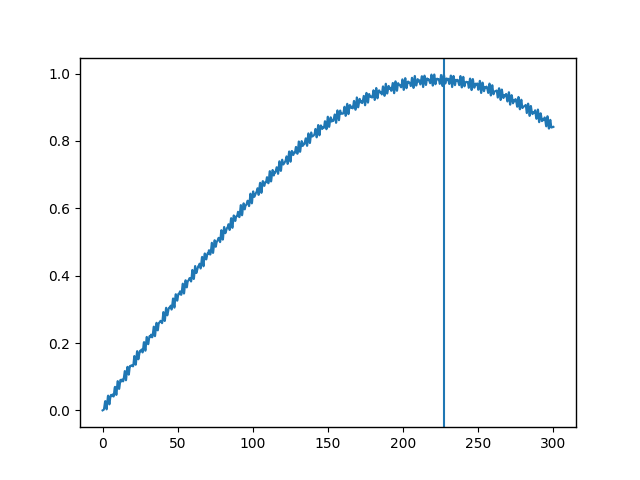

In [231]:
fig, ax = plt.subplots()
ax.plot(times, p_list)
# ax.plot(times, np.imag(e_list))
inspect_idx = 7175
ax.axvline(times[np.argmax(p_list)])
# ax.set_xlim(times[inspect_idx-100], times[inspect_idx+100])

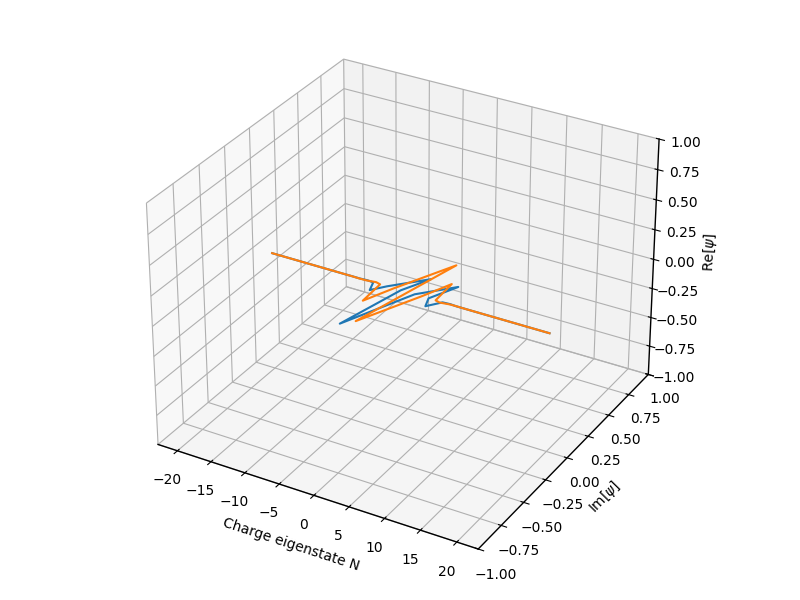

In [251]:
plot_wavefunction_3d([result1.states[7568], result2.states[7568]], num_states=2, idx=0, savefig=False, N0=N0)

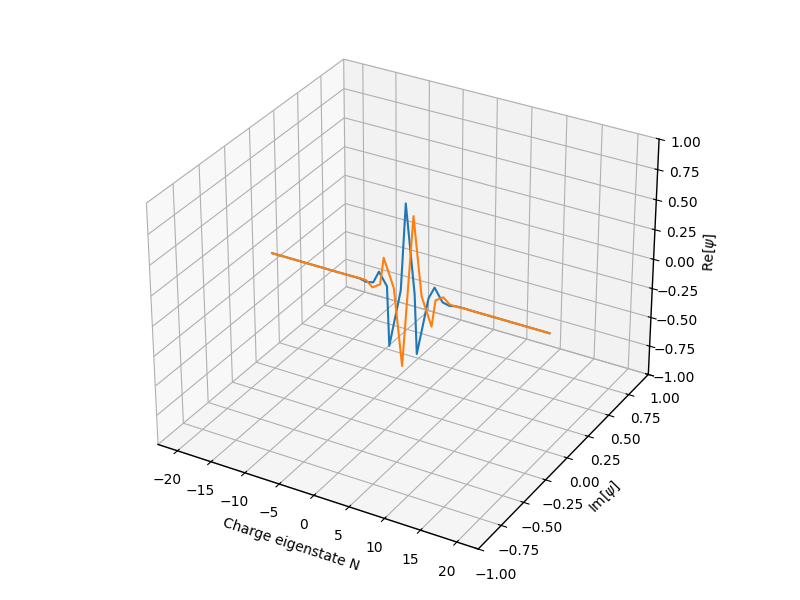

In [269]:
plot_wavefunction_3d([-np.exp(-1j*1.9)*result1.states[7568], -np.exp(-1j*1.9)*result2.states[7568]], num_states=2, idx=0, savefig=False, N0=N0)

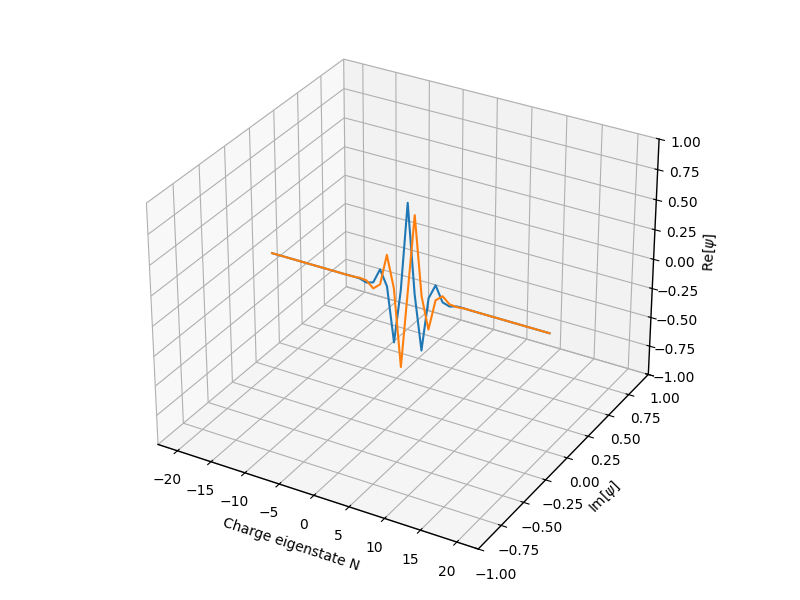

In [268]:
plot_wavefunction_3d([g, -e], num_states=2, idx=0, savefig=False, N0=N0)